(text:preface:modules_data_models)=
# Modules, Data Sets and Models #

TODO: discuss the code in `_code`.

In [1]:
# First, we need to set up the environment.

import sys
sys.path.insert(0, '../../_code')

import sklearn.metrics
import xml_book.data
import xml_book.models

import matplotlib.pyplot as plt
import numpy as np

from IPython.display import display

plt.style.use('seaborn')

This section briefly introduces example data sets that we will use throughout this book.

- *Two Moons* -- a two-dimensional toy data set generated with [scikit-learn][two-moons]; and
- *Bikes Sharing* -- a real-life data set that captures bike rentals (available via the [UCI repository][bikes]).

Moreover, it discusses two classifiers that will serve as our *black boxes* (trained on said data):

- *Random Forest* -- utilises the [`sklearn.ensemble.RandomForestClassifier`][sklearn-rf] class and serves as a probabilistic black box; and
- *Support Vector Machine* -- uses the [`sklearn.svm.SVC`][sklearn-svc] class and serves as a non-probabilistic black box.

[bikes]: https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset
[two-moons]: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html
[sklearn-rf]: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
[sklearn-svc]: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

---

**Reproducibility**&nbsp;&nbsp;&nbsp;&nbsp;
To ensure reproducibility of the data -- random generation of Two Moons and train/test split of both data sets -- we fix the random seeds of the Python's and numpy's `random` modules.
This can be easily done by calling `fatf.setup_random_seed(42)`, where `42` is the chosen random seed.
This step is already integrated into the data set creation functions -- `xml_book.data.generate_2d_moons` and `xml_book.data.generate_bikes` -- and can be accessed with their `random_seed` parameter, e.g.:
``` ipython
>>> xml_book.data.generate_2d_moons(random_seed=42)
```
If called without this parameter or with `None`, the random seed is not fixed.

Similarly, we may wish to train reproducible models.
This can be achieved by using the `random_state` parameter, which is available for every scikit-learn model class, e.g., `sklearn.svm.SVC(random_state=42)`.
Again, this functionality has already been integrated into the model creation functions in the `xml_book.models` library -- `xml_book.models.get_random_forest` and `xml_book.models.get_svc` -- and can be accessed via their `random_seed` parameter, e.g.:
``` ipython
>>> xml_book.models.get_svc(data, target, random_seed=42)
```
If called without this parameter or with `None`, the random seed is not fixed.

::: {admonition} Displaying the source of a function
:class: tip

If you want to see the source code of any function, you can use the following *magic* command available in Jupyter Notebooks:
``` ipython
?? xml_book.models.get_random_forest
```
:::

## Two Moons ##

First, let's generate a *toy* data set that is two-dimensional and easy to visualise.
It will help us to introduce plenty of concepts throughout this book.

To this end, we use scikit-learn's `sklearn.datasets.make_moons` function.
We generate a two moons data set with 1500 samples and 0.25 noise.
Next, we scale both of its features to the [0, 1] range.
Then, we separate 20% of the data into a dedicated *test* set.

For convenience, this procedure is neatly wrapped inside the `generate_2d_moons` function in a dedicated module `xml_book.data` distributed with this book.

Let's generate this data set and plot the corresponding *training* and *test* set.

In [2]:
# Generate 2-D moons data set
moons_train_X, moons_test_X, moons_train_y, moons_test_y = (
    xml_book.data.generate_2d_moons(random_seed=42)
)

22-Mar-21 18:35:46 fatf         INFO     Seeding RNGs using the input parameter.


22-Mar-21 18:35:46 fatf         INFO     Seeding RNGs with 42.


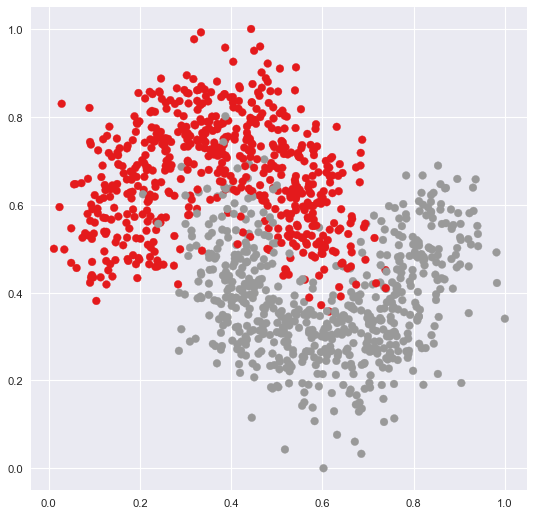

In [3]:
# Plot training data and their labels
plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(moons_train_X[:, 0], moons_train_X[:, 1],
            cmap=plt.cm.Set1, c=moons_train_y)
plt.tick_params(axis='both',
                which='both', bottom='off', top='off', labelbottom='off',
                right='off', left='off', labelleft='off')
plt.show()

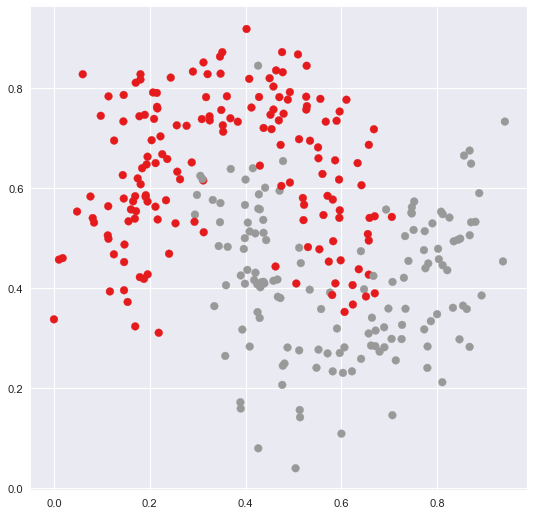

In [4]:
# Plot test data and their labels
plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(moons_test_X[:, 0], moons_test_X[:, 1],
            cmap=plt.cm.Set1, c=moons_test_y)
plt.tick_params(axis='both',
                which='both', bottom='off', top='off', labelbottom='off',
                right='off', left='off', labelleft='off')
plt.show()

## Bikes ##

Our second data set is *Bike Sharing*, which is distributed via the [UCI repository][bikes_].
It records a number of bike rentals (target) along various weather conditions and date artefacts (features).
The version used in this tutorial has the following 11 features:

- season:
  1. winter,
  2. spring,
  3. summer, and
  4. fall;
- year:
  0. 2011, and
  1. 2012;
- month -- 1 to 12;
- holiday -- weather the day is a holiday or not;
- weekday -- the day of the week;
- workingday -- 1 if the day is neither during the weekend nor a holiday,
  otherwise 0;
- weathersit:
  1. clear, few clouds, partly cloudy, partly cloudy,
  2. mist + cloudy, mist + broken clouds, mist + few clouds, mist,
  3. light snow, light rain + thunderstorm + scattered clouds,
     light rain + scattered clouds, and
  4. heavy rain + ice pallets + thunderstorm + mist, snow + fog;
- temp -- normalized temperature in Celsius;
- atemp -- normalized feeling temperature in Celsius;
- hum -- normalized humidity; and
- windspeed -- normalized wind speed.

In its original form, the target of the data set is the number of bikes used on a given day, making it a regression task.
However, for the purposes of this tutorial, we convert it into a classification problem.
We create a target variable that describes the day as having **low**, **medium** or **high** bike usage, which are defined by the following thresholds:

- **low:** $0 \leq y < 4000$,
- **medium:** $4000 \leq y < 6000$, and
- **high:** $6000 \leq y < 9000$;

where $y$ is the number of bikes rented on a given day.

[bikes_]: https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset

---

All of this processing is done in the `generate_bikes` function, which
is available in the `xml_book.data` library.
Let's use it to load the data.

In [5]:
(bikes_train_X,
 bikes_test_X,
 bikes_train_y,
 bikes_test_y,
 bikes_feature_names,
 bikes_target_name) = xml_book.data.generate_bikes(random_seed=42)

bikes_target_classes = ['low', 'medium', 'high']

22-Mar-21 18:35:47 fatf         INFO     Seeding RNGs using the input parameter.


22-Mar-21 18:35:47 fatf         INFO     Seeding RNGs with 42.


In [6]:
print('Features number: {}.'.format(bikes_train_X.shape[1]))
print('Training instances number: {}.'.format(bikes_train_X.shape[0]))
print('Testing instances number: {}.'.format(bikes_test_X.shape[0]))

Features number: 11.
Training instances number: 584.
Testing instances number: 147.


Now, let's visualise the class proportions for the training and test sets.

Text(0.5, 1.0, 'Class Distribution of Test Data')

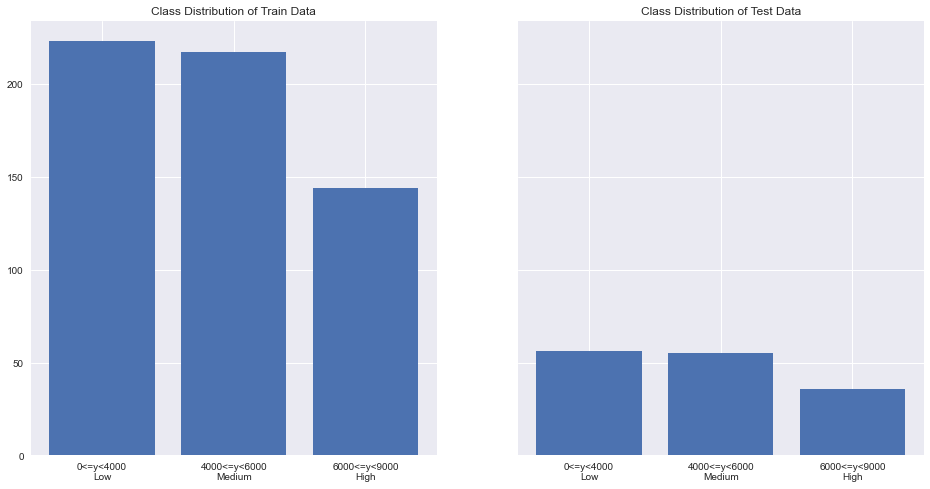

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True)

bins = [0, 4000, 6000, 9000]
bin_names = [
    '{:.0f}<=y<{:.0f}\nLow'.format(bins[0], bins[1]),
    '{:.0f}<=y<{:.0f}\nMedium'.format(bins[1], bins[2]),
    '{:.0f}<=y<{:.0f}\nHigh'.format(bins[2], bins[3])
]

_, train_counts = np.unique(bikes_train_y, return_counts=True)
axs[0].bar(bin_names, train_counts)
axs[0].set_title('Class Distribution of Train Data')

_, test_counts = np.unique(bikes_test_y, return_counts=True)
axs[1].bar(bin_names, test_counts)
axs[1].set_title('Class Distribution of Test Data')

## Training Models ##
Now, let's train *black box* models on these data sets and evaluate their
train and test set predictive performance.
We will use two models:

* `sklearn.ensemble.RandomForestClassifier` treated as a *probabilistic*
  classifier; and
* `sklearn.svm.SVC` operated as a *crisp* (non-probabilistic) classifier.

### Two Moons ###

#### Random Forest ####
Let's start with a simple *probabilistic* model based on the Random Forest
classifier.

In [8]:
clf_moons_probabilistic = xml_book.models.get_random_forest(
    moons_train_X, moons_train_y, random_seed=42)

22-Mar-21 18:35:51 fatf         INFO     Seeding RNGs using the input parameter.


22-Mar-21 18:35:51 fatf         INFO     Seeding RNGs with 42.


It has the following training set log loss:

In [9]:
moons_prob_predictions_train = clf_moons_probabilistic.predict_proba(
    moons_train_X)

moons_prob_train_performance = sklearn.metrics.log_loss(
    moons_train_y, moons_prob_predictions_train)

print('Training set *log loss*: {:.3}.'.format(moons_prob_train_performance))

Training set *log loss*: 0.116.


It has the following testing set log loss:

In [10]:
moons_prob_predictions_test = clf_moons_probabilistic.predict_proba(
    moons_test_X)

moons_prob_test_performance = sklearn.metrics.log_loss(
    moons_test_y, moons_prob_predictions_test)

print('Testing set *log loss*: {:.3}.'.format(moons_prob_test_performance))

Testing set *log loss*: 0.225.


#### Support Vector Machine ####
Next, we train a simple crisp (non-probabilistic) model.

In [11]:
clf_moons_crisp = xml_book.models.get_svc(
    moons_train_X, moons_train_y, random_seed=42)

22-Mar-21 18:35:51 fatf         INFO     Seeding RNGs using the input parameter.


22-Mar-21 18:35:51 fatf         INFO     Seeding RNGs with 42.


It has the following training set accuracy:

In [12]:
moons_crisp_predictions_train = clf_moons_crisp.predict(
    moons_train_X)

moons_crisp_train_performance = sklearn.metrics.accuracy_score(
    moons_train_y, moons_crisp_predictions_train)

print('Training set *accuracy*: {:.3}.'.format(moons_crisp_train_performance))

Training set *accuracy*: 0.939.


It has the following testing set accuracy:

In [13]:
moons_crisp_predictions_test = clf_moons_crisp.predict(
    moons_test_X)

moons_crisp_test_performance = sklearn.metrics.accuracy_score(
    moons_test_y, moons_crisp_predictions_test)

print('Testing set *accuracy*: {:.3}.'.format(moons_crisp_test_performance))

Testing set *accuracy*: 0.91.


### Bikes ###

#### Random Forest ####
Let's start with a simple *probabilistic* model based on the Random Forest
classifier.

In [14]:
clf_bikes_probabilistic = xml_book.models.get_random_forest(
    bikes_train_X, bikes_train_y, random_seed=42)

22-Mar-21 18:35:51 fatf         INFO     Seeding RNGs using the input parameter.


22-Mar-21 18:35:51 fatf         INFO     Seeding RNGs with 42.


It has the following training set log loss:

In [15]:
bikes_prob_predictions_train = clf_bikes_probabilistic.predict_proba(
    bikes_train_X)

bikes_prob_train_performance = sklearn.metrics.log_loss(
    bikes_train_y, bikes_prob_predictions_train)

print('Training set *log loss*: {:.3}.'.format(bikes_prob_train_performance))

Training set *log loss*: 0.267.


It has the following testing set log loss:

In [16]:
bikes_prob_predictions_test = clf_bikes_probabilistic.predict_proba(
    bikes_test_X)

bikes_prob_test_performance = sklearn.metrics.log_loss(
    bikes_test_y, bikes_prob_predictions_test)

print('Testing set *log loss*: {:.3}.'.format(bikes_prob_test_performance))

Testing set *log loss*: 0.411.


#### Support Vector Machine ####
Next, we train a simple crisp (non-probabilistic) model.

In [17]:
clf_bikes_crisp = xml_book.models.get_svc(
    bikes_train_X, bikes_train_y, random_seed=42)

22-Mar-21 18:35:51 fatf         INFO     Seeding RNGs using the input parameter.


22-Mar-21 18:35:51 fatf         INFO     Seeding RNGs with 42.


It has the following training set accuracy:

In [18]:
bikes_crisp_predictions_train = clf_bikes_crisp.predict(
    bikes_train_X)

moons_crisp_train_performance = sklearn.metrics.accuracy_score(
    bikes_train_y, bikes_crisp_predictions_train)

print('Training set *accuracy*: {:.3}.'.format(moons_crisp_train_performance))

Training set *accuracy*: 0.771.


It has the following testing set accuracy:

In [19]:
bikes_crisp_predictions_test = clf_bikes_crisp.predict(
    bikes_test_X)

moons_crisp_test_performance = sklearn.metrics.accuracy_score(
    bikes_test_y, bikes_crisp_predictions_test)

print('Training set *accuracy*: {:.3}.'.format(moons_crisp_test_performance))

Training set *accuracy*: 0.776.


## Jupyter Variable Storage ##
(**This functionality is not available in Colab.**)

If you wish to reuse any of these variables in other notebooks,
you can store and load them with Jupyter *magic*: `%store` and `%store -r`
respectively, e.g.:

In [20]:
moons_data_dictionary = {
    'train': {
        'X': moons_train_X,
        'y': moons_train_y 
    },
    'test': {
        'X': moons_test_X,
        'y': moons_test_y 
    },
    'feature_names': ['feature_1', 'feature_2'],
    'class_names': ['class_1', 'class_2']
}

bikes_data_dictionary = {
    'train': {
        'X': bikes_train_X,
        'y': bikes_train_y 
    },
    'test': {
        'X': bikes_test_X,
        'y': bikes_test_y 
    },
    'feature_names': bikes_feature_names,
    'class_names':  bikes_target_classes
}

In [21]:
%store moons_data_dictionary
%store clf_moons_probabilistic
%store clf_moons_crisp

Stored 'moons_data_dictionary' (dict)
Stored 'clf_moons_probabilistic' (RandomForestClassifier)
Stored 'clf_moons_crisp' (SVC)


In [22]:
%store bikes_data_dictionary
%store clf_bikes_probabilistic
%store clf_bikes_crisp

Stored 'bikes_data_dictionary' (dict)
Stored 'clf_bikes_probabilistic' (RandomForestClassifier)
Stored 'clf_bikes_crisp' (SVC)


Let's see what variables are stored.

In [23]:
%store

Stored variables and their in-db values:
bikes_data_dictionary               -> {'train': {'X': array([[ 2.       ,  0.       ,  4
clf_bikes_crisp                     -> SVC(random_state=42)
clf_bikes_probabilistic             -> RandomForestClassifier(max_depth=7, n_estimators=5
clf_moons_crisp                     -> SVC(random_state=42)
clf_moons_probabilistic             -> RandomForestClassifier(max_depth=7, n_estimators=5
moons_data_dictionary               -> {'train': {'X': array([[0.5708247 , 0.31394848],
 


Now, let's overwrite one of them and restore it with `%store -r`.

In [24]:
moons_data_dictionary = None
print(moons_data_dictionary)

None


In [25]:
%store -r moons_data_dictionary

In [26]:
moons_data_dictionary.keys()

dict_keys(['train', 'test', 'feature_names', 'class_names'])

::: {admonition} Passing variables between Jupyter Notebooks
:class: tip

It is possible to *store* a variable in one Jupyter Notebook and *retrieve* it in another.
You can do so with two [*magic*][storemagic] commands:
``` ipython
%store variable_name
```
to store a variable named `variable_name` and
``` ipython
%store -r variable_name
```
to load a variable named `variable_name`.
You can also list all of the stored variables by using the `%store` magic function without any parameter, i.e.:
``` ipython
%store
```
More information can be found [here][storemagic].
**Note that this feature does not work with Google Colab.**
:::

[storemagic]: https://ipython.readthedocs.io/en/stable/config/extensions/storemagic.html